In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
%matplotlib inline

## Images

In [22]:
train_path = '../files_provided/data/train/'
test_path = '../files_provided/data/test/'
# getting a list of each patient
patients = os.listdir(train_path+'/images')
patients.sort()
patients

['patient_002.npz',
 'patient_003.npz',
 'patient_004.npz',
 'patient_005.npz',
 'patient_007.npz',
 'patient_008.npz',
 'patient_011.npz',
 'patient_014.npz',
 'patient_015.npz',
 'patient_016.npz',
 'patient_017.npz',
 'patient_018.npz',
 'patient_020.npz',
 'patient_021.npz',
 'patient_022.npz',
 'patient_023.npz',
 'patient_024.npz',
 'patient_025.npz',
 'patient_026.npz',
 'patient_029.npz',
 'patient_030.npz',
 'patient_031.npz',
 'patient_032.npz',
 'patient_033.npz',
 'patient_035.npz',
 'patient_036.npz',
 'patient_037.npz',
 'patient_039.npz',
 'patient_040.npz',
 'patient_042.npz',
 'patient_043.npz',
 'patient_044.npz',
 'patient_045.npz',
 'patient_047.npz',
 'patient_048.npz',
 'patient_051.npz',
 'patient_052.npz',
 'patient_053.npz',
 'patient_056.npz',
 'patient_057.npz',
 'patient_058.npz',
 'patient_061.npz',
 'patient_063.npz',
 'patient_064.npz',
 'patient_067.npz',
 'patient_068.npz',
 'patient_069.npz',
 'patient_070.npz',
 'patient_072.npz',
 'patient_073.npz',


(92, 92, 92)


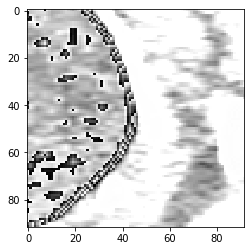

In [6]:
# Checking an image
archive = np.load(train_path + '/images/'+ 'patient_002.npz')
scan = archive['scan']
mask = archive['mask']
print(scan.shape)
# print(scan)

# Viewing the image
img = Image.fromarray(scan,'LA')
imshow(img)

In [4]:
# train_images
# for patient in patients:
#     archive = np.load(train_images_path + '/'+ patient)
#     scan = archive['scan']
#     mask = archive['mask']
# scan

## Other Features in CSVs
- $Clinical Data$: basic meta-information for each patient
- $Radiomics features$: hand crafted features from the tumoral zone by experts 

In [82]:
df_clinical = pd.read_csv(train_path+'features/clinical_data.csv')
# df.head()
# df_clinical = df_clinical.sort_values('PatientID')
df_clinical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
PatientID        300 non-null int64
Histology        280 non-null object
Mstage           300 non-null int64
Nstage           300 non-null int64
SourceDataset    300 non-null object
Tstage           300 non-null int64
age              284 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 16.5+ KB


In [144]:
df_radiomics = pd.read_csv(train_path + 'features/radiomics.csv',skiprows=[0,2])
df_radiomics.columns.values[0] = "PatientID"
# df_radiomics = df_radiomics.sort_values('PatientID')
df_radiomics = df_radiomics.sort_values('PatientID')
df_radiomics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 115 to 77
Data columns (total 54 columns):
PatientID                                       300 non-null int64
original_shape_Compactness1                     300 non-null float64
original_shape_Compactness2                     300 non-null float64
original_shape_Maximum3DDiameter                300 non-null float64
original_shape_SphericalDisproportion           300 non-null float64
original_shape_Sphericity                       300 non-null float64
original_shape_SurfaceArea                      300 non-null float64
original_shape_SurfaceVolumeRatio               300 non-null float64
original_shape_VoxelVolume                      300 non-null float64
original_firstorder_Energy                      300 non-null float64
original_firstorder_Entropy                     300 non-null float64
original_firstorder_Kurtosis                    300 non-null float64
original_firstorder_Maximum                     300 non-null float64

In [138]:
df_radiomics = df_radiomics.drop(['PatientID'],axis=1)
X_train = df_radiomics.to_numpy()
X_train

array([[2.42390038e-02, 2.08752545e-01, 1.00682670e+02, ...,
        9.38104181e+02, 3.53673006e-03, 6.56733284e+03],
       [1.45203831e-02, 7.49132080e-02, 1.78117938e+02, ...,
        6.95615307e+02, 6.14528606e-03, 9.01956835e+02],
       [2.29721714e-02, 1.87502189e-01, 1.33895482e+02, ...,
        1.20854632e+03, 3.42991660e-03, 3.74026835e+03],
       ...,
       [2.05004582e-02, 1.49323920e-01, 1.11067547e+02, ...,
        1.00967590e+03, 4.62486076e-03, 8.73847993e+03],
       [2.52195095e-02, 2.25982869e-01, 8.93252484e+01, ...,
        1.62129351e+03, 2.99727754e-03, 2.39972251e+03],
       [2.28332401e-02, 1.85241092e-01, 9.10439454e+01, ...,
        9.28074629e+02, 2.74039158e-03, 2.28869662e+03]])

In [125]:
labels = pd.read_csv(train_path + '/train_labels.csv')
labels = labels.sort_values('PatientID')
labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 115 to 77
Data columns (total 3 columns):
PatientID       300 non-null int64
SurvivalTime    300 non-null int64
Event           300 non-null int64
dtypes: int64(3)
memory usage: 9.4 KB


In [131]:
Y_train = labels['SurvivalTime'].values

In [143]:
def get_features_from_csvs(path):
    df = pd.read_csv(path + 'features/radiomics.csv',skiprows=[0,2])
    df.columns.values[0] = "PatientID"
    df = df.sort_values('PatientID')
    df = df.drop(['PatientID'],axis=1)
    return df.to_numpy()

X_train = get_features_from_csvs(train_path)
X_test = get_features_from_csvs(test_path)
print(X_train.shape, X_test.shape)

(300, 53) (125, 53)


# Appendix
## Radiomics
Radiomics features are designed with the goal of providing off-the-shelf quantitative features describing tumors, computed on radiology imaging data. Such features have the pros of offering quantitative and reproducible analyses. A standard pipeline for analyzing radiology imaging data could be:
- Annotating the tumoral zone by a segmentation mask
- Extracting radiomics with a certified software / library
- Plugging those features into usual machine learning / survival regression models

Designing those features requires advanced medical knowledge, and a lot of experience in prognosis / medical models. Hence, a large number of informative features have been identified by groups of medical experts in radio-oncology, related to colour or density heterogeneity, compactness, and many others.

This challenge uses a subset of 53 features which have been identified as worth-to-be-looked-at for the proposed task.


## List of radiomics used in the challenge
The below lists each feature furnished for this challenge.  
Details over each computed feature can be found at https://pyradiomics.readthedocs.io/en/v1.0/radiomics.html#

### Shape
- 'Compactness1'
- 'Compactness2'
- 'Maximum3DDiameter'
- 'SphericalDisproportion'
- 'Sphericity'
- 'SurfaceArea'
- 'SurfaceVolumeRatio'
- 'VoxelVolume'

### Firstorder
- 'Energy'
- 'Entropy'
- 'Kurtosis'
- 'Maximum'
- 'Mean'
- 'MeanAbsoluteDeviation'
- 'Median'
- 'Minimum'
- 'Range'
- 'RootMeanSquared'
- 'Skewness'
- 'StandardDeviation'
- 'Uniformity'
- 'Variance'

### Glcm:
- 'Autocorrelation'
- 'ClusterProminence'
- 'ClusterShade'
- 'ClusterTendency'
- 'Contrast'
- 'Correlation'
- 'DifferenceEntropy'
- 'DifferenceAverage' #Dissimilarity
- 'JointEnergy' 
- 'JointEntropy'
- 'Id' #homogeneity1
- 'Idm' #homogeneity1
- 'Imc1'
- 'Imc2'
- 'Idmn'
- 'Idn'
- 'InverseVariance'
- 'MaximumProbability'
- 'SumAverage'
- 'SumEntropy'

### Glrlm:
- 'ShortRunEmphasis'
- 'LongRunEmphasis'
- 'GrayLevelNonUniformity'
- 'RunLengthNonUniformity'
- 'RunPercentage'
- 'LowGrayLevelRunEmphasis'
- 'HighGrayLevelRunEmphasis'
- 'ShortRunLowGrayLevelEmphasis'
- 'ShortRunHighGrayLevelEmphasis'
- 'LongRunLowGrayLevelEmphasis'
- 'LongRunHighGrayLevelEmphasis'